# Dùng Wavelet để tách tín hiệu

1. Tổng quan về biến đổi wavelets
Một trong các công cụ để lọc và phân tách tín hiệu rất mạnh là các biến đổi Wavelets. Đây là công cụ thích hợp để áp dụng cho các tín hiệu phi tuyến (non-linear) và không có tần số cố định (non-stationary), là các tín hiệu thường gặp trong lĩnh vực tín hiệu y sinh. Ví dụ như tín hiệu nhịp tim, tín hiệu hô hấp, các chuyển động của cơ thể v.v. Wavelets khác với công cụ phân tích tín hiệu dùng Fourier Transform, được áp dụng để lọc và tách các dải tín hiệu có tần số xác định. 

2. Ý tưởng của việc phân tách tín hiệu là tín hiệu chúng ta có được cấu tạo nên từ một số tín hiệu cơ bản nào đó (tín hiệu cơ sở). Bằng cách nhân chập tín hiệu của ta có được với các tín hiệu cơ sở, ta sẽ có được tập tham số thể hiện mối quan hệ tuyến tính giữa tín hiệu gốc với tập tín hiệu cơ sở:

  $y = \Sigma_i^N{\alpha_i \Phi_i(x)}$    với $\Phi_i(x)$ là các tín hiệu cơ sở, $\alpha_i$ là các hệ số.

> Indented block



### Ví dụ: Tín hiệu y = f1 + f2 + f3

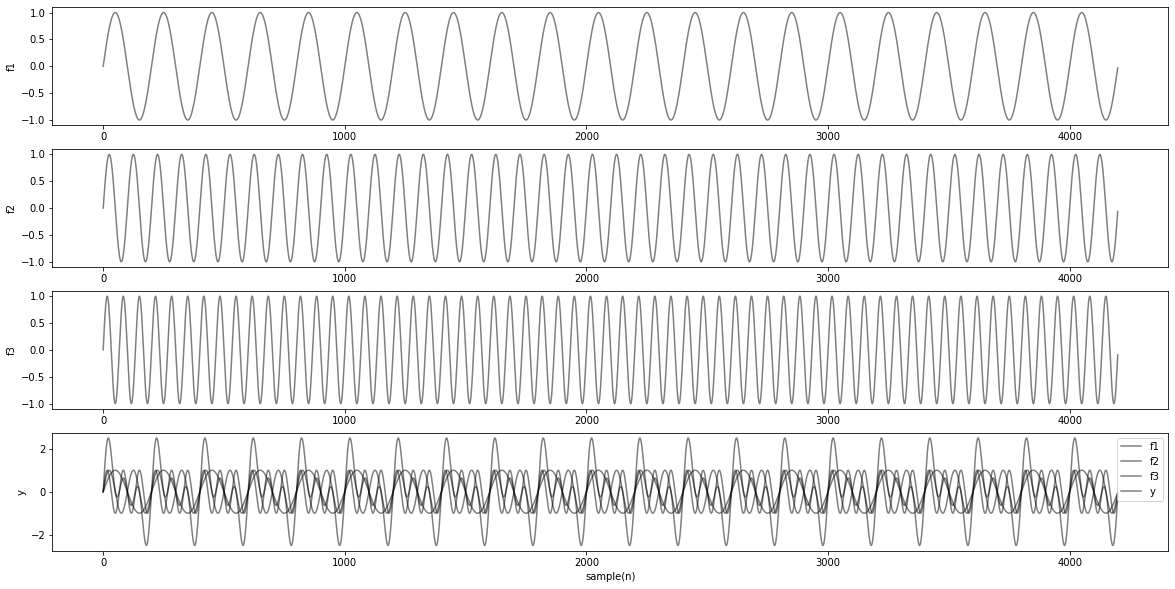

In [146]:
import matplotlib.pyplot as plt
import numpy as np

Fs = 300
f1 = 1.5; p1 = Fs/f1
f2 = 3.0; p2 = Fs/f2
f3 = 4.5; p3 = Fs/f3
sample = 4200
x = np.arange(sample)
f1 = np.sin(2*np.pi*f1/Fs*x)  # tín hiệu f1 
f2 = np.sin(2*np.pi*f2/Fs*x) # tín hiệu f2
f3 = np.sin(2*np.pi*f3/Fs*x) # tín hiệu f3
y = f1 + f2 + f3

plt.figure(figsize=(20,10))
label = ['f1', 'f2', 'f3', 'y']
plt.subplot(4, 1, 1)
plt.plot(x, f1, label='f1')
plt.ylabel('f1')

plt.subplot(4, 1, 2)
plt.plot(x, f2, label='f2')
plt.ylabel('f2')

plt.subplot(4, 1, 3)
plt.plot(x, f3, label='f3')
plt.ylabel('f3')

plt.subplot(4, 1, 4)
plt.plot(x, f1, label='f1')
plt.plot(x, f2, label='f2')
plt.plot(x, f3, label='f3')
plt.plot(x, y, label='y')
plt.xlabel('sample(n)')
plt.ylabel('y')
plt.legend()
plt.show()

### Biểu diễn với scaleogram
Để thể hiện tương quan giữa sự thay đổi tín hiệu theo quy luật tần số và vị trí của các thay đổi theo tương quan chuỗi thời gian thì biểu diễn dùng scaleogram có thể được sử dụng. 

Gói thư viện scaleogram có thể được cài đặt để sử dụng với python. 
Lưu ý là trong biểu diễn có một bug nhỏ về biểu diễn với hệ số coi (Cone of Inference). Tham số bị lỗi khi chạy mặc định. 
Ta có thể khắc phục bằng cách sửa lại bằng cách mô tả cụ thể tham số coi thông qua giá trị coikw={'alpha':0.5, 'hatch':'/'}. Hoặc sửa trực tiếp như hướng dẫn sau:
'https://github.com/matplotlib/matplotlib/issues/17805'

** Hệ số COI là vùng gạch tam giác trong hình, nó dùng đánh giá miền bị ảnh hưởng của biến đổi scaleogram ở các biên của chuỗi dữ liệu

### Cài đặt gói scaleogram

In [ ]:
!pip install scaleogram

#### Ví dụ test với một hàm tuần hoàn có chu kỳ p1 = 20 và p2 =60

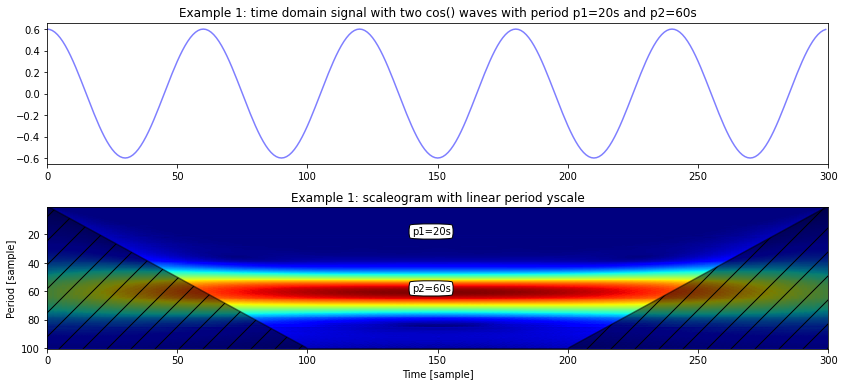

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scaleogram as scg

n = 300
#n = len(y)
time = np.arange(n)
p1    = 20;  f1 = 1./p1
p2    = 60; f2 = 1./p2
data =  0.6*np.cos( (2*np.pi*f2) * time)#np.cos( (2*np.pi*f1) * time)+
wavelet='cmor1-1.5'



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(time, data, c='b'); ax1.set_xlim(0, n)
ax1.set_title('Example 1: time domain signal with two cos() waves with period p1=%ds and p2=%ds'%(p1,p2))
ax2 = scg.cws(time, data, scales=np.arange(1, 150), wavelet=wavelet,coi=True, coikw={'alpha':0.5, 'hatch':'/'},
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [sample]", xlabel="Time [sample]",
        title='Example 1: scaleogram with linear period yscale')
txt = ax2.annotate("p1=%ds" % p1, xy=(n/2,p1), xytext=(n/2-10, p1), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("p2=%ds" % p2, xy=(n/2,p2), xytext=(n/2-10, p2), bbox=dict(boxstyle="round4", fc="w"))

#### Ví dụ với biểu diễn với chuỗi có độ dài mẫu là 4200 và tần số f1= 1.5, f2 = 3.0, f3 = 4.5

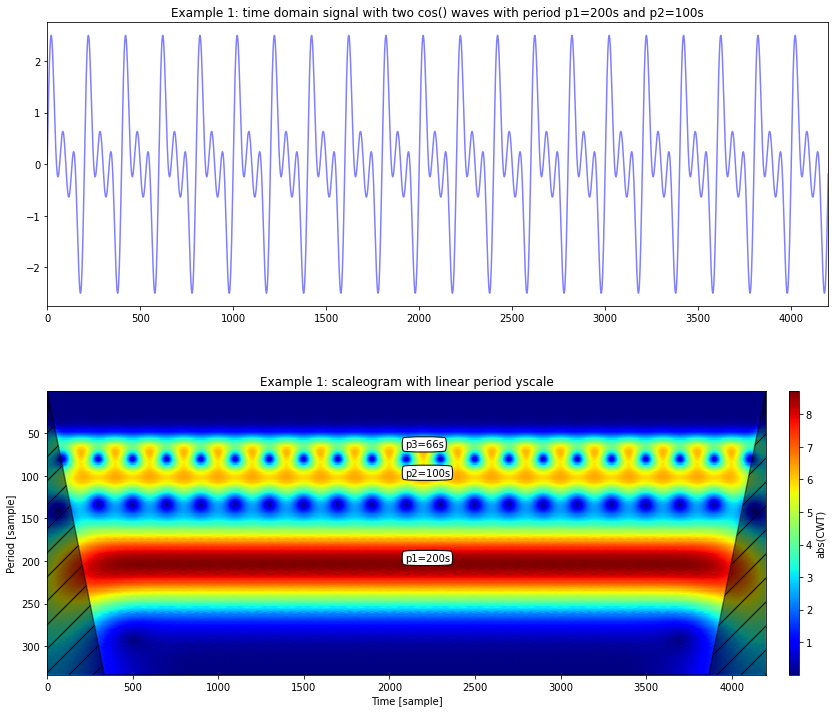

In [149]:

Fs = 300
f1 = 1.5; p1 = Fs/f1
f2 = 3.0; p2 = Fs/f2
f3 = 4.5; p3 = Fs/f3
sample = 4200
x = np.arange(sample)
f1 = np.sin(2*np.pi*f1/Fs*x)  # tín hiệu f1 
f2 = np.sin(2*np.pi*f2/Fs*x) # tín hiệu f2
f3 = np.sin(2*np.pi*f3/Fs*x) # tín hiệu f3
y = f1 + f2 + f3


wavelet='cmor0.7-1.5' # Lưu ý bạn nên thử nghiệm với các hệ số tần số trung tâm khác (ở đây là 1.5) để xem hiệu ứng ví dụ 'cmor0.7-3', thay đổi độ scale ở dòng 22: scales=np.arange(1, 1000, 2)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x, y, c='b'); ax1.set_xlim(0, len(x))
ax1.set_title('Example 1: time domain signal with two cos() waves with period p1=%ds and p2=%ds'%(p1,p2))
ax2 = scg.cws(x, y, scales=np.arange(1, 500, 2), wavelet=wavelet,coi=True, coikw={'alpha':0.5, 'hatch':'/'},
        ax=ax2, cmap="jet", cbar='vertical',  ylabel="Period [sample]", xlabel="Time [sample]",
        title='Example 1: scaleogram with linear period yscale')
txt = ax2.annotate("p1=%ds" % p1, xy=(sample/2,p1), xytext=(sample/2-10, p1), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("p2=%ds" % p2, xy=(sample/2,p2), xytext=(sample/2-10, p2), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("p3=%ds" % p3, xy=(sample/2,p3), xytext=(sample/2-10, p3), bbox=dict(boxstyle="round4", fc="w"))

Ta thấy quy luật lặp của chuỗi tín hiệu lần lượt là 200, 100 và 66 mẫu (sample) ứng với các tần số f1 = 1.5, 3, và 4.5 Hz

### Các hàm wavelets cơ sở:
Có nhiều hàm cơ sở để thực hiện phân tích wavelets. Nổi bật nhất là biến đổi sử dụng hàm Daubechies (db). Đây là biến đổi cho phép phân giải tín hiệu thành các thành phần tín hiệu độc lập nhau. Ngoài ra còn có các biến đổi theo các hàm cơ sở khác như Harr, Symlets, Coiflets, v.v. như hình minh họa dưới đây

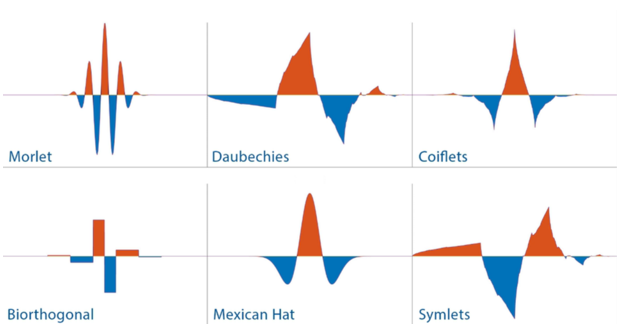



### Ứng dụng wavelets
Wavelets có thể được sử dụng để lọc nhiễu, tách baseline khỏi tín hiệu gốc trước khi thực hiện các giải thuật phân tích và trích xuất đặc trưng của tín hiệu sinh học

## Sử dụng PyWt trong python

Để sử dụng phân tích wavelets trong python, gói Pywt cho phép ta làm việc này. 
Sau đây là ví dụ minh họa sử dụng pywt để phân tách và tổng hợp lại tín hiệu.

Hàm wavedec thực hiện phân giải tín hiệu thành các thành phần xấp xỉ (approximations: thành phần chứa tần số thấp của tín hiệu (cA)) và thành phần chi tiết (details: thành phần chứa tần số cao của tín hiệu (cD))

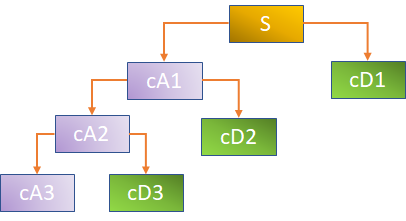

Có các kiểu phân tách tín hiệu wavelets sau đây:
* phân tách rời rạc (discreate wavelet transform (dwt))
* phân tách liên tục (continuous wavelet trasform (cwt))
* phân tách trạng thái tĩnh (stationary wavelet transform (swt))
dwt là phương pháp hay được sử dụng trong phân tích wavelets, swt khác với dwt ở chỗ nó bảo toàn kích thước của các tham số phân tách ($cA_i, cD_i$) trong khi dwt sẽ thực hiện giảm lấy mẫu và tăng lấy mẫu trong việc phân tách và tái khôi phục tín hiệu do đó các hệ số ($cA_i, cD_i$) sẽ suy giảm khi số tầng phân tách sâu hơn. 

###Ví dụ dùng DWT trong gói thư viện *PyWt*  

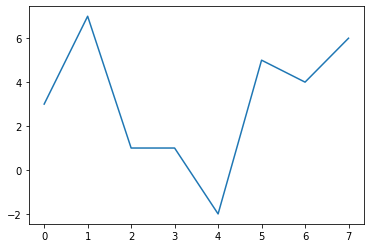

In [ ]:
import pywt
import matplotlib.pyplot as plt

x = [3, 7, 1, 1, -2, 5 ,4 , 6]
### Sử dụng hàm wavelet daubenchie (db1)
db1 = pywt.Wavelet('db1')
a3, d3, d2, d1 = pywt.wavedec(x, db1)
# Vẽ tín hiệu minh họa
plt.plot(x)

Khôi phục lại tín hiệu 

In [ ]:
print(pywt.waverec([a3, d3, d2, d1], db1))

[ 3.  7.  1.  1. -2.  5.  4.  6.]


***Lưu ý là khi ta không mô tả về mức phân giải (level=?) thì mặc định chương trình sẽ phân tách ở mức một (level=1). ***


Một số hàm wavelet có thể sử dụng có thể kiểm tra bằng cash gọi hàm wavelist()

In [ ]:
pywt.wavelist('coif')

['coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17']

Một số hàm wavelet trong pyWt gồm:
 ***'haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus',
'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'***

###Ví dụ phân giải và tổng hợp tín hiệu với 3 mức dùng swt

In [ ]:
# Phân giải tín hiệu
coeffs = pywt.swt(x, db1,level=3)
coeffs

[(array([8.83883476, 8.83883476, 8.83883476, 8.83883476, 8.83883476,
         8.83883476, 8.83883476, 8.83883476]),
  array([-0.35355339, -3.8890873 , -5.30330086, -3.18198052,  0.35355339,
          3.8890873 ,  5.30330086,  3.18198052])),
 (array([ 6. ,  3.5,  2.5,  4. ,  6.5,  9. , 10. ,  8.5]),
  array([ 4.0000000e+00,  4.5000000e+00, -5.0000000e-01, -5.0000000e+00,
         -3.5000000e+00, -8.8817842e-16,  0.0000000e+00,  5.0000000e-01])),
 (array([ 7.07106781,  5.65685425,  1.41421356, -0.70710678,  2.12132034,
          6.36396103,  7.07106781,  6.36396103]),
  array([-2.82842712,  4.24264069,  0.        ,  2.12132034, -4.94974747,
          0.70710678, -1.41421356,  2.12132034]))]

Có thể chỉ định và nhóm các thành phần riêng biệt. Ví dụ:

In [ ]:
(A3, D3), (A2, D2), (A1, D1) = pywt.swt(x, db1, level=3)

Vẽ hình minh họa tín hiệu sau khi phân giải

Text(0, 0.5, 'D3')

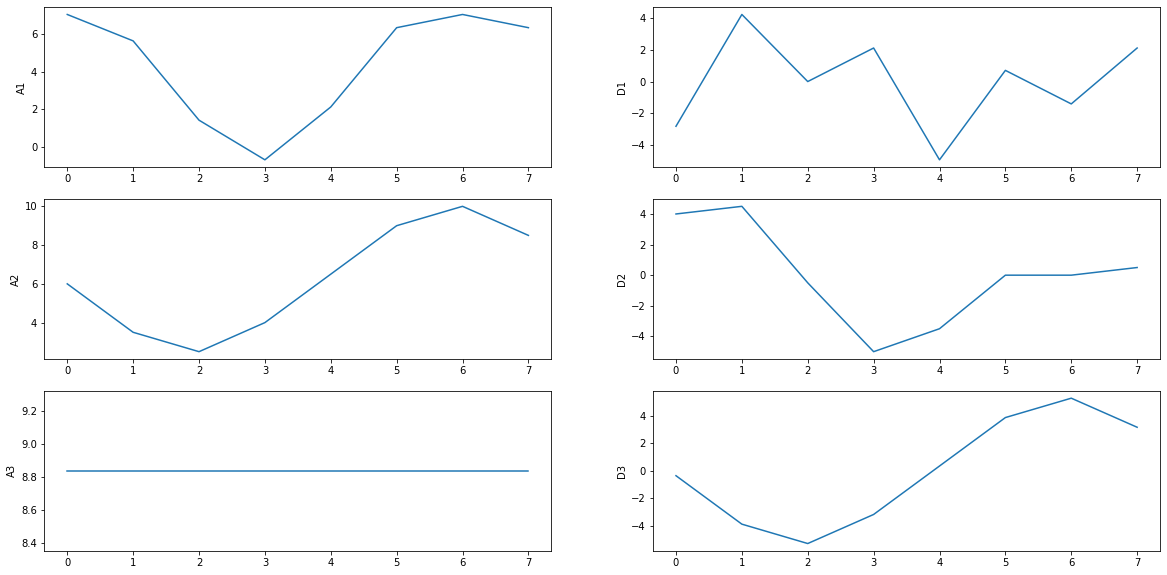

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(321)
plt.plot(A1)
plt.ylabel('A1')
plt.subplot(322)
plt.plot(D1)
plt.ylabel('D1')
plt.subplot(323)
plt.plot(A2)
plt.ylabel('A2')
plt.subplot(324)
plt.plot(D2)
plt.ylabel('D2')

plt.subplot(325)
plt.plot(A3)
plt.ylabel('A3')
plt.subplot(326)
plt.plot(D3)
plt.ylabel('D3')

## Phân tách một tín hiệu PPG

#### Đọc dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


ppg = pd.read_csv('https://raw.githubusercontent.com/taile2007/Biosignal-analysis/master/Data%20wrangling-01-Importation/ppgdata.csv', header=0)

Tín hiệu này có 4 kênh PPG ở 4 bước sóng khác nhau ('580nm', '640nm', '850nm' )và '940nm'

In [ ]:
ppg.describe()

,850nm,640nm,940nm,580nm
count,6.211100e+04,6.211100e+04,6.211100e+04,6.211100e+04
mean,9.694630e+05,-1.032224e+06,7.972880e+05,-1.434944e+06
std,4.304648e+04,1.920902e+04,6.144342e+04,1.185263e+04
min,8.868740e+05,-1.089510e+06,6.909060e+05,-1.458660e+06
25%,9.281860e+05,-1.044760e+06,7.584640e+05,-1.443620e+06
50%,9.677430e+05,-1.035690e+06,7.821660e+05,-1.438300e+06
75%,1.013120e+06,-1.021515e+06,8.218290e+05,-1.429510e+06
max,1.039490e+06,-9.561600e+05,1.068020e+06,-1.401060e+06


Ta sẽ tách một kênh để phân tích wavelets. Cụ thể ở đây ta sử dụng kênh '940nm'

In [ ]:
from sklearn.preprocessing import minmax_scale
#Wavelet Decompsition
# wavelet đòi hỏi số điểm dữ liệu là số chẵn. 
# Ở đây ta thực hiện tìm số điểm trong chuỗi tín hiệu có độ dài là bội của chiều dài 1024

#name = '580nm'
name = '940nm'
M = np.size(ppg[name])
n = np.floor(np.log2(M))
N = int(2**n)
res = M - N
while res > 1023:
  n = np.floor(np.log2(res))
  N = N + int(2**n)
  res = M - N
# Scaling tín hiệu về khoảng (0,1)
data  = ppg[name][0:N] - np.mean(ppg[name][0:N])
data  = minmax_scale(ppg[name][0:N])
# Phân tách thành bảy mức tín hiệu
WDS = pywt.swt(data, 'db10', level=7)

Phân tách thành bảy mức tín hiệu

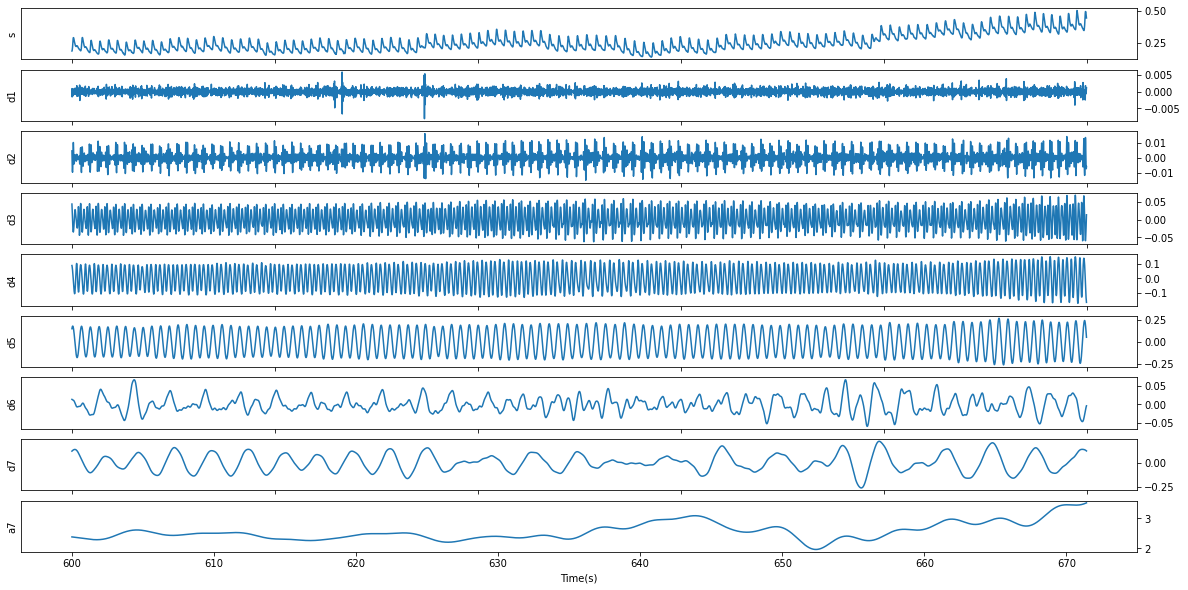

In [ ]:
fig,axs = plt.subplots(9,1,figsize=(20,10))

L1, L2 = 42000, 47000
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,9)]
labels = ['s','d1','d2','d3','d4','d5','d6','d7', 'a7']
for ax,i in zip(axs,n):
  

  if i==8:
     ax.plot(x, WDS[0][0][L1:L2])
     ax.set_xlabel('Time(s)') 
     
  elif i==0:
    ax.plot(data[L1:L2])
    
  else:
    ax.plot(WDS[7-i][1][L1:L2])
    
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  
  ax.label_outer() # hidden xtick

Tín hiệu xấp xỉ (a7) thể hiện đường baseline của tín hiệu gốc (s). Lưu ý là phân tích swt dẫn đến hiện tượng dịch trên thang thời gian (time shifting) của tín hiệu a7 so với s.

### Khôi phục tín hiệu gốc
Để tách đường baseline ta dùng lựa chọn **trim_approx= True**; khi đó hàm swt sẽ tách thành dạng [cAn, cDn, ..., cD2, cD1]

In [ ]:
WDS = pywt.swt(data, 'db10', level=7, trim_approx=True) ### Like pywt.wavedec fucntion ==> return [cAn, cDn, ..., cD2, cD1]

### Loại bỏ D1, D2

In [ ]:
WDS[-2:] = np.zeros_like(WDS[-2:])

### Khôi phục tín hiệu

Tín hiệu PPG

In [ ]:
# Khôi phục tín hiệu với [D6, D5,..,D1]
s2 = pywt.iswt(WDS[2:8], 'db10')

Tín hiệu Baseline

In [ ]:
baseline = pywt.iswt([WDS[0]], 'db10')

Tín hiệu sau khi tách

Text(0.5, 0, 'Samples')

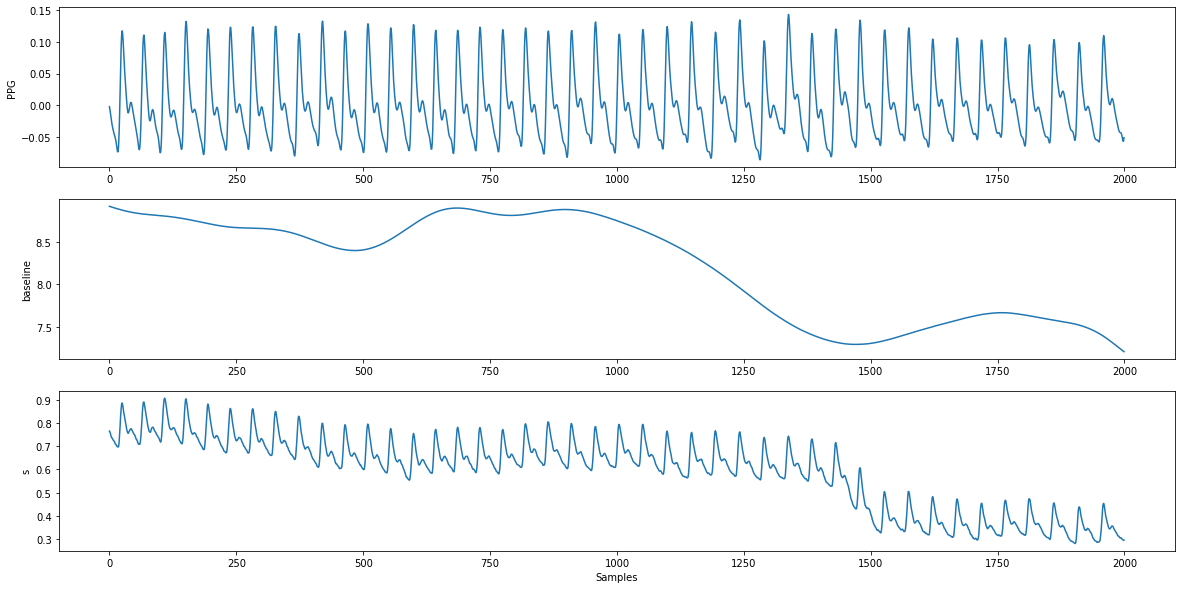

In [ ]:
L1, L2 = 2500, 4500
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(s2[L1:L2])
plt.ylabel('PPG')

plt.subplot(312)
plt.plot(baseline[L1:L2])
plt.ylabel('baseline')

plt.subplot(313)
plt.plot(data[L1:L2])
plt.ylabel('s')
plt.xlabel('Samples')


##Tóm tắt
Trong phần này bạn làm quen với biến đổi wavelets
* Phương pháp wavelets thích hợp với các tín hiệu non-linear, non-stationary 
* Ứng dụng wavelets để lọc nhiễu, tách tín hiệu và baseline. 
* Ta có thể sử dụng thư viện pyWt với các hàm biến đổi wavelets như swt để phân giải và iswt để khôi phục tín hiệu. 

** Lưu ý là swt tạo ra sự dịch thời gian trong tín hiệu được phân tách.

*** Có thể sử dụng scaleogram để quan sát quy luật thay đổi của tín hiệu và vị trí cục bộ của chuỗi tín hiệu đó. 

Bạn có thể tìm hiểu thêm về scaleogram trong link dưới đây:
https://github.com/alsauve/scaleogram/blob/master/doc/scale-to-frequency.ipynb